In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Pytorch-Tutorial/master/houseprice.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

In [ ]:
df.shape

(1201, 10)

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [ ]:
for i in df.columns:   ### printing the unique values
  print("Column name {} has {} unique values".format(i,len(df[i].unique())))

Column name MSSubClass has 15 unique values
Column name MSZoning has 5 unique values
Column name LotFrontage has 110 unique values
Column name LotArea has 869 unique values
Column name Street has 2 unique values
Column name LotShape has 4 unique values
Column name YearBuilt has 112 unique values
Column name 1stFlrSF has 678 unique values
Column name 2ndFlrSF has 368 unique values
Column name SalePrice has 597 unique values


In [ ]:
import datetime
present=datetime.datetime.now().year
print(present)

2024


In [ ]:
df['Total Years']=present-df['YearBuilt'] ### duration of the house in years

In [ ]:
df.drop('YearBuilt',axis=1,inplace=True) ### removing/dropping the YearBuilt column

In [ ]:
df.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [ ]:
### Creating Categorical Features
cat_features=['MSSubClass', 'MSZoning','Street','LotShape'] ###features that could be categorical( the ones with the low unique values)
out_features='SalePrice'

In [ ]:
from sklearn.preprocessing import LabelEncoder          ### using label encoder we will fit_transform all the categorical features
lbl_encoder={}
lbl_encoder['MSSubClass']=LabelEncoder()
lbl_encoder['MSSubClass'].fit(df['MSSubClass'])

LabelEncoder()

In [ ]:
lbl_encoder['MSSubClass'].transform(df['MSSubClass'])

array([5, 0, 5, ..., 6, 0, 0])

In [ ]:
from sklearn.preprocessing import LabelEncoder
for feature in cat_features:
  lbl_encoder={}
  lbl_encoder[feature]=LabelEncoder()
  df[feature]=lbl_encoder[feature].fit_transform(df[feature])               ### are the categorical features are fit_transformed with label_Encoder

In [ ]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,21
1,0,3,80.0,9600,1,3,1262,0,181500,48
2,5,3,68.0,11250,1,0,920,866,223500,23
3,6,3,60.0,9550,1,0,961,756,140000,109
4,5,3,84.0,14260,1,0,1145,1053,250000,24
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,25
1456,0,3,85.0,13175,1,3,2073,0,210000,46
1457,6,3,66.0,9042,1,3,1188,1152,266500,83
1458,0,3,68.0,9717,1,3,1078,0,142125,74


In [ ]:
### Stacking and Converting into Tensors

# Convert to numpy
import numpy as np
cat_features=np.stack([df['MSSubClass'], df['MSZoning'],df['Street'],df['LotShape']],1)     ##stacking on the other axis
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [ ]:
### Convert numpy to Tensor
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)   ## int because categorical features cannot be converted to float
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [ ]:
cont_features=[]         ### here are the continuous features
for i in df.columns:
  if i in ['MSSubClass', 'MSZoning','Street','LotShape','SalePrice']:
    pass
  else:
    cont_features.append(i)

In [ ]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [ ]:
## Stacking continuous variable to a tensor
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float) ## continuous values can be converted to float

In [ ]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [ ]:
cont_values.dtype

torch.float32

## Till here both the categorical and the continuous features have been converted to the respective tensors

In [ ]:
## Dependent feature
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)             ## dependent feature is also converted to float
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

The only dependent feature 'SalePrice' has also been converted to tensor

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int64  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int64  
 5   LotShape     1201 non-null   int64  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total Years  1201 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 103.2 KB


In [ ]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [ ]:
len(df['MSSubClass'].unique())

15

### Embeeding size for categorical columns

# Note: Embeeding is only done for categorical data

In [ ]:
## Note: Embeeding is only done for categorical data
cat_dims=[len(df[col].unique()) for col in ['MSSubClass', 'MSZoning','Street','LotShape']]      ### taking the number of unique values of the Categorical data in cat_dims
cat_dims


[15, 5, 2, 4]

In [ ]:
### Thumb Rule: Output dimension should be setbased on the input dimension(min(50,feature_Dimension/2))

embeeding_dim=[(x,min(50,(x+1)//2)) for x in cat_dims]     ### So it will give the number of inputs and outputs in the same ().

In [ ]:
### Preprocessing steps
embeeding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embeeding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [ ]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [ ]:
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [ ]:
pd.set_option('display.max_rows',500)
embedding_val=[]
for i,e in enumerate(embed_representation):
  embedding_val.append(e(cat_features[:,i]))

In [ ]:
embedding_val

[tensor([[ 1.2022,  0.2859,  1.7306,  ..., -0.8416,  1.7347, -0.8700],
         [ 0.1972, -0.7361, -0.8662,  ...,  0.7740,  0.9763,  0.8677],
         [ 1.2022,  0.2859,  1.7306,  ..., -0.8416,  1.7347, -0.8700],
         ...,
         [-0.7218, -0.7851, -1.1233,  ..., -1.1025, -0.1019,  1.4969],
         [ 0.1972, -0.7361, -0.8662,  ...,  0.7740,  0.9763,  0.8677],
         [ 0.1972, -0.7361, -0.8662,  ...,  0.7740,  0.9763,  0.8677]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[ 2.8133, -0.0119,  0.5665],
         [ 2.8133, -0.0119,  0.5665],
         [ 2.8133, -0.0119,  0.5665],
         ...,
         [ 2.8133, -0.0119,  0.5665],
         [ 2.8133, -0.0119,  0.5665],
         [ 2.8133, -0.0119,  0.5665]], grad_fn=<EmbeddingBackward0>),
 tensor([[0.4907],
         [0.4907],
         [0.4907],
         ...,
         [0.4907],
         [0.4907],
         [0.4907]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 1.1342,  1.3362],
         [ 1.1342,  1.3362],
         [-0.3187, -0.7564],

In [ ]:
## to stack up properly  ---> column wise
z=torch.cat(embedding_val,1)
z

tensor([[ 1.2022,  0.2859,  1.7306,  ...,  0.4907,  1.1342,  1.3362],
        [ 0.1972, -0.7361, -0.8662,  ...,  0.4907,  1.1342,  1.3362],
        [ 1.2022,  0.2859,  1.7306,  ...,  0.4907, -0.3187, -0.7564],
        ...,
        [-0.7218, -0.7851, -1.1233,  ...,  0.4907,  1.1342,  1.3362],
        [ 0.1972, -0.7361, -0.8662,  ...,  0.4907,  1.1342,  1.3362],
        [ 0.1972, -0.7361, -0.8662,  ...,  0.4907,  1.1342,  1.3362]],
       grad_fn=<CatBackward0>)

In [ ]:
### implement dropout---->dropout is used to prevent overfitting
dropout=nn.Dropout(.4)

In [ ]:
final_embed=dropout(z)
final_embed

tensor([[ 2.0037,  0.4765,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.3286, -1.2269, -1.4437,  ...,  0.0000,  1.8904,  0.0000],
        [ 0.0000,  0.0000,  2.8844,  ...,  0.0000, -0.5311, -1.2606],
        ...,
        [-1.2030, -1.3085, -0.0000,  ...,  0.0000,  0.0000,  2.2269],
        [ 0.3286, -0.0000, -0.0000,  ...,  0.8179,  1.8904,  2.2269],
        [ 0.3286, -1.2269, -1.4437,  ...,  0.0000,  0.0000,  0.0000]],
       grad_fn=<MulBackward0>)

This class FeedForwardNN defines a feedforward neural network (FFNN) in PyTorch for handling a combination of categorical and continuous input features. Let's break down the key components and functionality:

Initialization (__init__):

The constructor (__init__) initializes the neural network architecture. It takes several parameters:
embedding_dim: A list of tuples specifying the dimensions of embedding layers for categorical variables. Each tuple contains the input size and the output size of the embedding layer.
n_cont: The number of continuous input features.
out_sz: The output size (number of classes or dimensions) of the neural network.
layers: A list specifying the sizes of hidden layers in the network.
p: Dropout probability (defaulted to 0.5).
Inside the constructor, embedding layers are created for each categorical variable specified in embedding_dim. These embeddings are stored in self.embeds.
Dropout and batch normalization layers are initialized for handling regularization and normalization of input features.
The layers of the neural network are defined using the specified architecture (layers).
Forward Pass (forward):

The forward method defines how data flows through the network during forward pass.
Categorical features (x_Cat) are processed through their respective embedding layers and concatenated together.
The concatenated embeddings are passed through a dropout layer (self.emb_drop) for regularization.
Continuous features (x_cont) are normalized using batch normalization (self.bn_cont).
Concatenated embeddings and continuous features are concatenated together and passed through the hidden layers defined in self.layers.
The output of the last layer is returned.

In [ ]:
## Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

  def __init__(self,embeeding_dim,n_cont,out_sz,layers,p=0.5):

# self, embeeding_dim, number of continuous values,output size,layers,dropout ratio
# embedding_dim: A list of tuples specifying the dimensions of embedding layers for categorical variables. Each tuple contains the input size and the output size of the embedding layer.
# n_cont: The number of continuous input features.
# out_sz: The output size (number of classes or dimensions) of the neural network.
# layers: A list specifying the sizes of hidden layers in the network.
# p: Dropout probability (defaulted to 0.5).


    # Initialize the neural network architectures
    super().__init__()
    #Embedding layer for categorical variables
    self.embeds=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embeeding_dim])
    #Dropout layer for embeddings
    self.emb_drop=nn.Dropout(p)
    #Batch layers for normalization
    self.bn_cont=nn.BatchNorm1d(n_cont)

    #Define the hidden layers of the neural network
    layerlist=[]
    #calculate total size of the embedding
    n_emb=sum((out for inp,out in embeeding_dim))
    # Total number of input features (embeddings(for categorical) + continuous)
    n_in=n_emb+n_cont


    #Create hidden layers
    for i in layers:
      layerlist.append(nn.Linear(n_in,i))  #Add linear transformation
      layerlist.append(nn.ReLU(inplace=True)) #Apply the relu function
      layerlist.append(nn.BatchNorm1d(i)) #Apply the batch normalization
      layerlist.append(nn.Dropout(p)) #Apply the Dropout feature
      n_in=i #update input size for the next layer

    #Output layer
    layerlist.append(nn.Linear(layers[-1],out_sz)) #Add output layer  (last layer and the output)
    self.layers=nn.Sequential(*layerlist)  #Define Sequential Model of the layers

  def forward(self,x_cat,x_cont):
    #Forward pass throught the network

    embeddings=[]
     #Process categorical features through the embedding layers
    for i,e in enumerate(self.embeds):    #embedding each categorical feature
      embeddings.append(e(x_cat[:,i]))
    x=torch.cat(embeddings,1) # Concatenate embeddings along the second dimension
    x=self.emb_drop(x) #Apply dropout to the embeddings

    #Normalize continuous features
    x_cont=self.bn_cont(x_cont)
    #Concatenate embeddings and continuous features
    x=torch.cat([x,x_cont],1)
    # Pass concatenated features through hidden layers
    x=self.layers(x)

    return x


In [ ]:
len(cont_features)

5

In [ ]:
torch.manual_seed(100)
model=FeedForwardNN(embeeding_dim,len(cont_features),1,[100,50],p=0.4)

In [ ]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [ ]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
df.shape

(1201, 10)

In [ ]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [ ]:
cont_values.shape

torch.Size([1201, 5])

In [ ]:
### Performiin a train test split
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [ ]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [ ]:
### The process of training
epochs=5000
final_losses=[]
for i in range(epochs):
  i=i+1
  y_pred=model(train_categorical,train_cont)
  loss=torch.sqrt(loss_function(y_pred,y_train))   ### RMSE
  final_losses.append(loss.detach().numpy())

  if i%10==0:
      print("Epoch number:{} with the loss: {}".format(i,loss.item()))

  optimizer.zero_grad()
  loss.backward()    ### backpropagation
  optimizer.step()

Epoch number:10 with the loss: 200493.8125
Epoch number:20 with the loss: 200489.59375
Epoch number:30 with the loss: 200483.25
Epoch number:40 with the loss: 200474.3125
Epoch number:50 with the loss: 200462.6875
Epoch number:60 with the loss: 200448.3125
Epoch number:70 with the loss: 200430.15625
Epoch number:80 with the loss: 200410.375
Epoch number:90 with the loss: 200386.671875
Epoch number:100 with the loss: 200359.375
Epoch number:110 with the loss: 200323.6875
Epoch number:120 with the loss: 200294.671875
Epoch number:130 with the loss: 200256.421875
Epoch number:140 with the loss: 200215.71875
Epoch number:150 with the loss: 200171.046875
Epoch number:160 with the loss: 200115.78125
Epoch number:170 with the loss: 200070.484375
Epoch number:180 with the loss: 200012.21875
Epoch number:190 with the loss: 199951.703125
Epoch number:200 with the loss: 199879.984375
Epoch number:210 with the loss: 199820.09375
Epoch number:220 with the loss: 199750.390625
Epoch number:230 with t

Text(0.5, 0, 'Epochs')

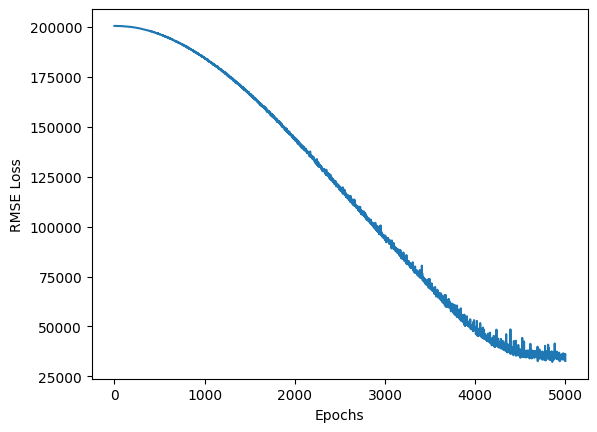

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs),final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('Epochs')

In [ ]:
### Validate the test data
y_pred=""
with torch.no_grad():
  y_pred=model(test_categorical,test_cont)
  loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 43376.609375


In [ ]:
data_verify=pd.DataFrame(y_test.tolist(),columns=['Test'])

In [ ]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [ ]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,128257.15625,1742.84375
1,138887.0,203703.12500,-64816.12500
2,175500.0,170906.62500,4593.37500
3,195000.0,233781.15625,-38781.15625
4,142500.0,215435.09375,-72935.09375


In [ ]:
### Saving the Model
### Save the Model
torch.save(model,'HousePrice.pt')

In [ ]:
torch.save(model.state_dict(),'HouseWeights.pt')

In [ ]:
### Loading the saved model
embs_size=[(15,8),(5,3),(2,1),(4,2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [ ]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [ ]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)